## **U.S. Post Office Analysis**

With the 2020 Presisential election fast approaching, and the huge amount of mail-in ballots expected to be cast due to COVID-19, the postal service has been front and center in the news lately. I stumbled accross this webpage,
[Pieces of mail since 1789](https://about.usps.com/who-we-are/postal-history/pieces-of-mail-since-1789.htm). 

I scraped the table containg # of post offices, pieces handled, total revenue and total expenses for each year so I could play around with the data.

#### A few factoids about this dataset and the USPS:
* Income/expenses listed for 1789 account for only three months. *(I multiplied the amt by 4 to estimate a full year)*
* Income first exceeded one million dollars in 1815.
* Expenses first exceeded one million dollars in 1818.
* The number of Post Offices peaked in 1901. The growth of rural free delivery, which became a permanent service in 1902, contributed to subsequent declines in the number of Post Offices.
* Income and expenses first exceeded one billion dollars in 1944.
* Effective July 1, 1971, the Post Office Department was transformed into the United States Postal Service, an independent establishment of the executive branch of the Government of the United States.
* The Postal Service last received a public service subsidy (taxpayer dollars) in 1982.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests


In [2]:
url = 'https://about.usps.com/who-we-are/postal-history/pieces-of-mail-since-1789.htm'
sess = requests.Session()
# work around browser cookie settings and infinite loops.
sess.headers['User-Agent'] = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.131 Safari/537.36'
res = sess.get(url)

In [3]:
pd.set_option('display.max_rows', 250)
pd.set_option('max_colwidth', 50)

In [4]:
soup = BeautifulSoup(res.content, 'lxml')
table = soup.find_all('table')[0]

In [5]:
dfs = pd.read_html(str(table))
df = dfs[0]
df

,Year,Pieces of Mail Handled,Number of Post Offices,Income,Expenses
0,1789,NaN,75,"$ 7,510","$ 7,560"
1,Income and expenses listed for 1789 are for th...,Income and expenses listed for 1789 are for th...,Income and expenses listed for 1789 are for th...,Income and expenses listed for 1789 are for th...,Income and expenses listed for 1789 are for th...
2,1790,NaN,75,37935,32140
3,1791,NaN,89,46294,36697
4,1792,NaN,195,67443,54530
5,1793,NaN,209,104746,72039
6,1794,NaN,450,128947,89972
7,1795,NaN,453,160620,117893
8,1796,NaN,468,195066,131571
9,1797,NaN,554,213998,150114


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    238 non-null    object
 1   Pieces of Mail Handled  131 non-null    object
 2   Number of Post Offices  238 non-null    object
 3   Income                  238 non-null    object
 4   Expenses                238 non-null    object
dtypes: object(5)
memory usage: 9.4+ KB


In [35]:
# check point
df2 = df.copy()
pattern = r'[0-9]{4}$'
filter = df2['Year'].str.contains(pattern) 
df2 = df2[filter]     # keep only rows with an actual year in the 'Year' col.

In [36]:
df2.head()

,Year,Pieces of Mail Handled,Number of Post Offices,Income,Expenses
0,1789,NaN,75,"$ 7,510","$ 7,560"
2,1790,NaN,75,37935,32140
3,1791,NaN,89,46294,36697
4,1792,NaN,195,67443,54530
5,1793,NaN,209,104746,72039


In [37]:
df2.at[0, 'Income'] = 7510
df2.at[0, 'Expenses'] = 7560
df2.set_index('Year', inplace=True)
df2.columns = ['Pieces_Handled', 'Post_Offices', 'Income', 'Expenses']
df2.head()

,Pieces_Handled,Post_Offices,Income,Expenses
Year,,,,
1789,NaN,75,7510,7560
1790,NaN,75,37935,32140
1791,NaN,89,46294,36697
1792,NaN,195,67443,54530
1793,NaN,209,104746,72039


In [38]:
col_list = ['Pieces_Handled', 'Post_Offices', 'Income', 'Expenses']
df2[col_list] = df2[col_list].apply(pd.to_numeric)
df2.head()

,Pieces_Handled,Post_Offices,Income,Expenses
Year,,,,
1789,NaN,75,7510,7560
1790,NaN,75,37935,32140
1791,NaN,89,46294,36697
1792,NaN,195,67443,54530
1793,NaN,209,104746,72039


In [39]:
df2.at['1789', 'Income'] = df2.at['1789', 'Income'] * 4
df2.at['1789', 'Expenses'] = df2.at['1789', 'Expenses'] * 4

In [51]:
# check point
df3 = df2.copy()
df3['Net_Profit'] = df3['Income'] - df3['Expenses']
df3['Net_Margin(%)'] = round(df3['Net_Profit']/df3['Income']*100, 2)
df3.head()

,Pieces_Handled,Post_Offices,Income,Expenses,Net_Profit,Net_Margin(%)
Year,,,,,,
1789,NaN,75,30040,30240,-200,-0.67
1790,NaN,75,37935,32140,5795,15.28
1791,NaN,89,46294,36697,9597,20.73
1792,NaN,195,67443,54530,12913,19.15
1793,NaN,209,104746,72039,32707,31.23


In [52]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231 entries, 1789 to 2019
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pieces_Handled  124 non-null    float64
 1   Post_Offices    231 non-null    int64  
 2   Income          231 non-null    int64  
 3   Expenses        231 non-null    int64  
 4   Net_Profit      231 non-null    int64  
 5   Net_Margin(%)   231 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 22.6+ KB


In [53]:
df3['P/L_per_Office'] = round(df3['Net_Profit']/df3['Post_Offices'], 2)
df3['P/L_per_Item'] = round(df3['Net_Profit']/df3['Pieces_Handled'], 4)

In [54]:
df3


,Pieces_Handled,Post_Offices,Income,Expenses,Net_Profit,Net_Margin(%),P/L_per_Office,P/L_per_Item
Year,,,,,,,,
1789,NaN,75,30040,30240,-200,-0.67,-2.67,NaN
1790,NaN,75,37935,32140,5795,15.28,77.27,NaN
1791,NaN,89,46294,36697,9597,20.73,107.83,NaN
1792,NaN,195,67443,54530,12913,19.15,66.22,NaN
1793,NaN,209,104746,72039,32707,31.23,156.49,NaN
1794,NaN,450,128947,89972,38975,30.23,86.61,NaN
1795,NaN,453,160620,117893,42727,26.60,94.32,NaN
1796,NaN,468,195066,131571,63495,32.55,135.67,NaN
1797,NaN,554,213998,150114,63884,29.85,115.31,NaN


/Users/michaelpatterson/anaconda3/envs/usps_env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


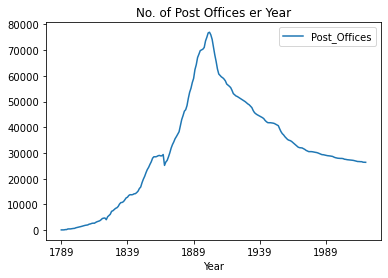

In [20]:
# Graph the number of post offices over time.
df3.plot(y='Post_Offices', kind='line')
plt.title('No. of Post Offices per Year')
plt.show()

In [25]:
top_10_profit = df3.sort_values(by='Profit/Loss', ascending=False).head(10).style.format('{:,}')
top_10_profit

,Pieces_Handled,Post_Offices,Income,Expenses,Profit/Loss
Year,,,,,
2003,"202,184,700,000","27,556","68,529,000,000","63,902,000,000","4,627,000,000"
1995,"180,733,700,000","28,392","54,293,500,000","50,730,200,000","3,563,300,000"
1996,"183,439,500,000","28,189","56,402,000,000","53,113,000,000","3,289,000,000"
2004,"206,105,600,000","27,505","68,996,000,000","65,851,000,000","3,145,000,000"
1997,"190,888,100,000","28,060","58,216,000,000","55,131,000,000","3,085,000,000"
1998,"196,904,700,000","27,952","60,072,000,000","57,786,000,000","2,286,000,000"
1999,"201,576,300,000","27,893","62,726,000,000","60,642,000,000","2,084,000,000"
1991,"165,850,600,000","28,912","43,884,472,000","42,119,000,000","1,765,472,000"
2005,"211,742,700,000","27,385","69,907,400,000","68,281,000,000","1,626,400,000"
